### **Exploratory Data Analysis**

In this EDA we are going to do the preprocessing of our database to be able to give the best possible variables to our model.

Let's start with the **treatment of outliers**. Where we will analyze two aproaches:

1.   Treatment of outliers by WOE
2.   Treatment of outliers by IQR

Then, we are going to analyze the **missing values**.

Finally, we are going to encode categroical values.




**Project Libraries**

In [1]:
# Importings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
import xgboost
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

**Database**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
bank_df = pd.read_csv("/content/drive/MyDrive/Data Glacier/Datasets/bank-additional/bank-additional-full.csv", sep=";")

Mounted at /content/drive


## **Quick Exploration**

In [4]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Categorical Features**

In [5]:
# Categorical features

categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
       

In [6]:
for col in categorical_cols:# categories
  print(col,":")
  print(bank_df[col].unique())

job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital :
['married' 'single' 'divorced' 'unknown']
education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default :
['no' 'unknown' 'yes']
housing :
['no' 'yes' 'unknown']
loan :
['no' 'yes' 'unknown']
contact :
['telephone' 'cellular']
month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome :
['nonexistent' 'failure' 'success']


**Numerical Features**

In [7]:
# Numerical features statistics
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Target Distribution**

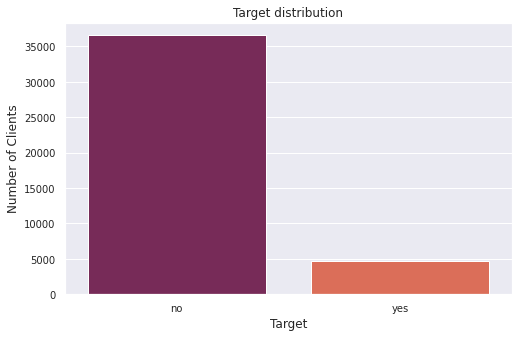

The amount of "no" target is =  36,548
The amount of "yes" target is = 4,640
The percentage of "no" target is = 88.73 %
The percentage of "yes" target is = 11.27 %


In [8]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x= 'y', data= bank_df, palette='rocket')
plt.xlabel("Target") 
plt.ylabel('Number of Clients')
plt.title("Target distribution")  
plt.show()
 #Finding the percentages of our target
per_target= (bank_df['y'] == 'yes').value_counts().to_frame('q')
n_target_q = per_target.q.iloc[0]
y_target_q = per_target.q.iloc[1]
total=per_target.q.sum() 
print('The amount of "no" target is =  {:,}'.format(n_target_q))
print('The amount of "yes" target is = {:,}'.format(y_target_q))
print(f'The percentage of "no" target is = {round((n_target_q/total)*100,2)}','%')
print(f'The percentage of "yes" target is = {round((y_target_q/total)*100,2)}','%')


The dataset is unbalanced. This will be taken into account in the data processing and implementation of the machine learning model.

**Customers distribution: age and age range** 

In [9]:
print('Max. Age: ', bank_df['age'].max())
print('Median age: ', bank_df['age'].median())
print('Average age: ', round(bank_df['age'].mean()))
print('Min. Age: ', bank_df['age'].min())

Max. Age:  98
Median age:  38.0
Average age:  40
Min. Age:  17


# **Outliers Detection**

First, let's see outliers in boxplot

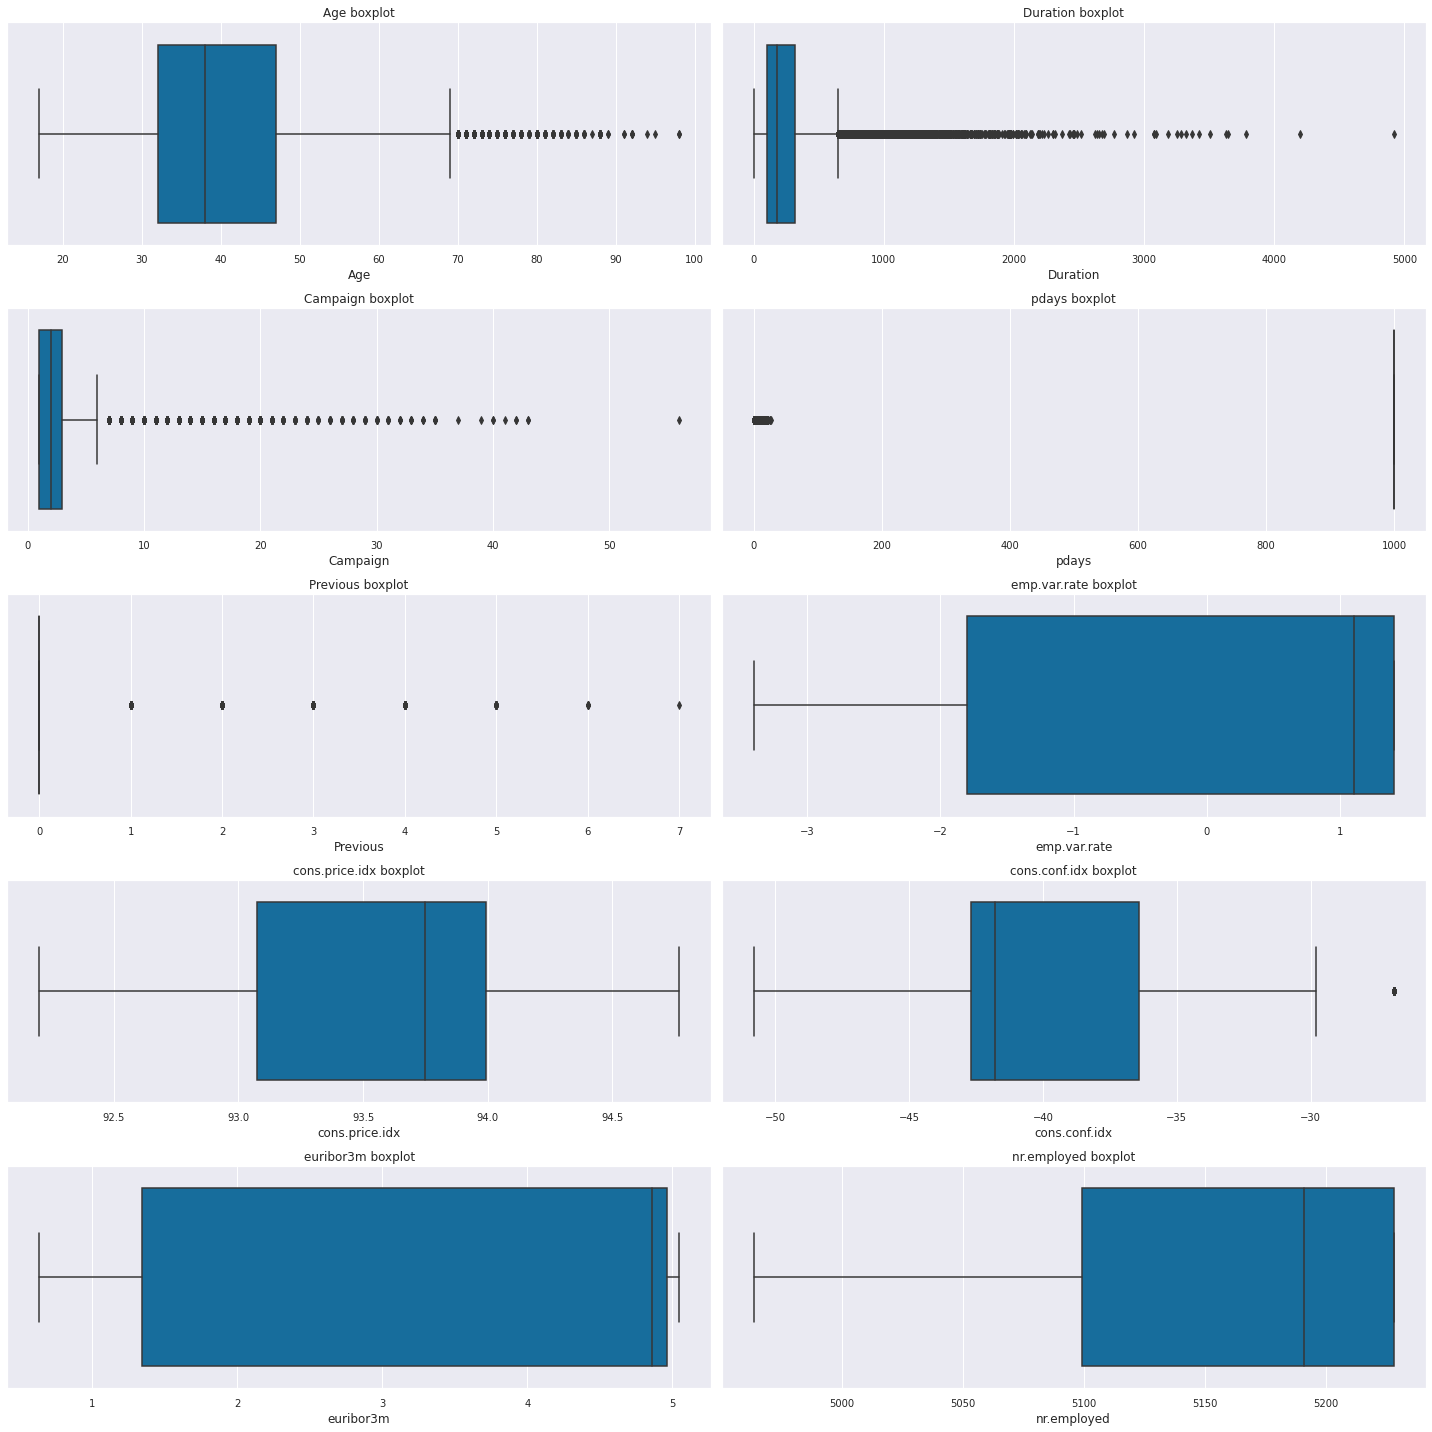

In [10]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

First approach to remove the outliers values is the classic IQR range criteria.

So looking at the boxplots, we could conclude that those variable which will need outliers treatment are:
- Age
- campaign
- duration 

## **1- IQR Outliers**

In [11]:
# Outlier filter

def remove_outliers(dfx):
    q1 = dfx.quantile(0.25)
    q3 = dfx.quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr*1.5
    
    df_filtred = dfx[~((dfx < (dfx.quantile(0.25) - cut_off)) | (dfx > (dfx.quantile(0.75) + cut_off))).any(axis=1)]
    
    
    return df_filtred

In [15]:
bank_df2 = bank_df[['age','duration','campaign']]
bank_df2 = remove_outliers(bank_df2)

In [27]:
print(bank_df.shape[0]-bank_df2.shape[0], 'rows have been eliminated')

5653 rows have been eliminated


In [ ]:
#bank_df2 = remove_outliers(bank_df2)

In [22]:
bank_df2.reset_index(drop=True, inplace=True)

In [23]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35535 entries, 0 to 35534
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       35535 non-null  int64
 1   duration  35535 non-null  int64
 2   campaign  35535 non-null  int64
dtypes: int64(3)
memory usage: 833.0 KB


Text(0.5, 0, 'Campaign')

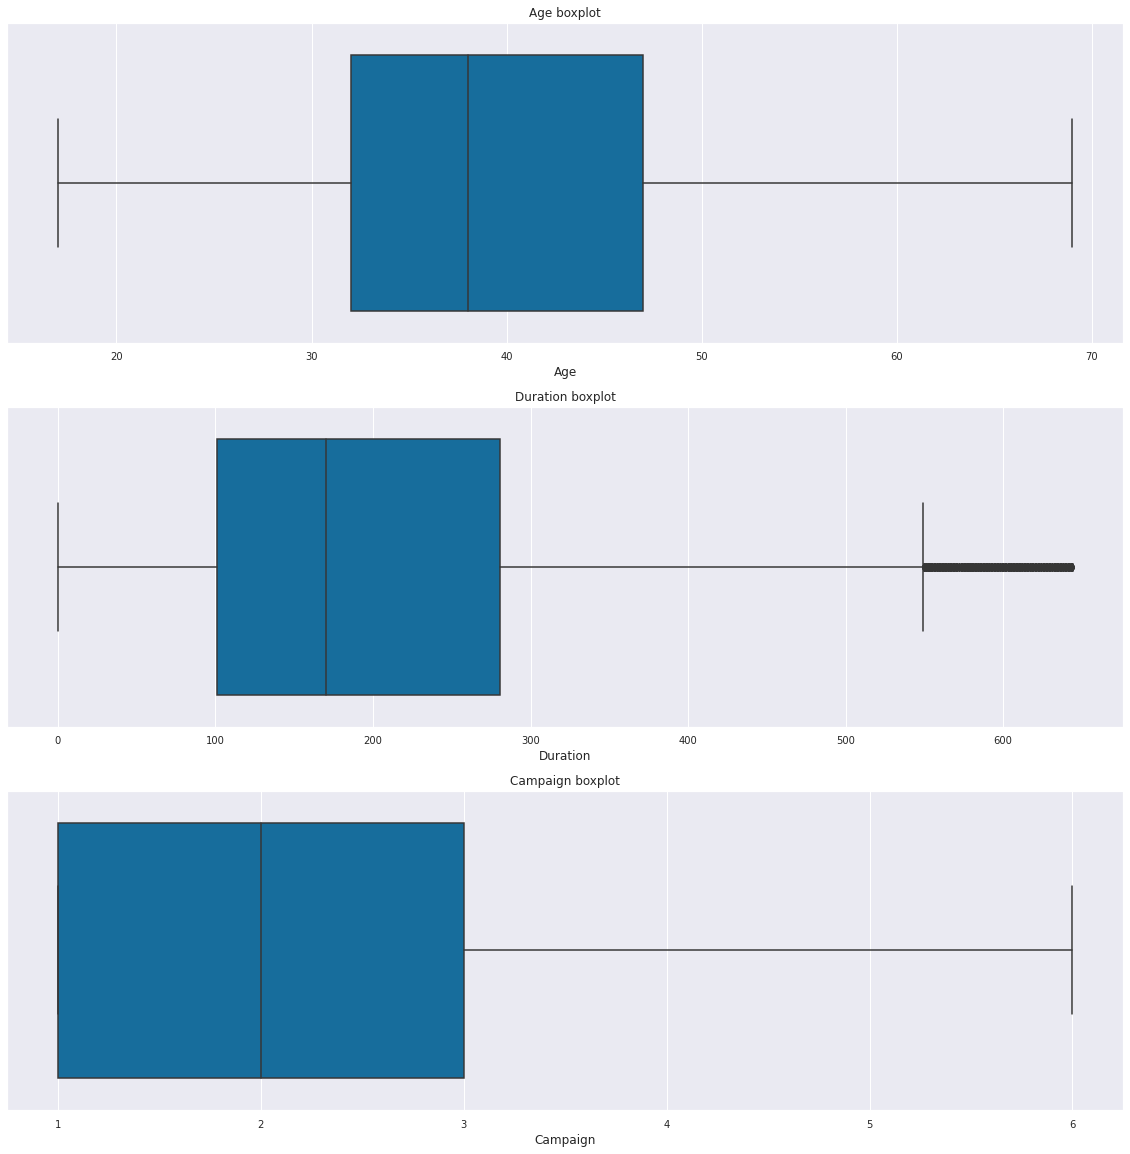

In [26]:
plt.figure(figsize = (20,20))
plt.subplot(3, 1, 1)
sns.boxplot(data = bank_df2, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(3, 1, 2)
sns.boxplot(data = bank_df2, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(3, 1, 3)
sns.boxplot(data = bank_df2, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')


## **2- WOE Outliers**

### **Function to calculate Information Value and WOE**

In [28]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [29]:
#CONVIERTO VARIABLE Y EN BINARIA
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [30]:
aux = bank_df['y'] == 'no'
aux1 = bank_df['y'] == 'yes'

#CONVIERTO
bank_df.at[aux, 'y'] = 0
bank_df.at[aux1, 'y'] = 1

bank_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [31]:
#APLICO FUNCION
iv, woe = iv_woe(data = bank_df, target = 'y', bins=10, show_woe = True)
print(iv)
#print(woe)

Information value of age is 0.139397
  Variable          Cutoff     N  ...  % of Non-Events       WoE        IV
0      age  (16.999, 28.0]  4216  ...         0.095217  0.510355  0.032358
1      age    (28.0, 31.0]  5114  ...         0.123290  0.060922  0.000472
2      age    (31.0, 33.0]  3679  ...         0.089882 -0.056859  0.000282
3      age    (33.0, 35.0]  3504  ...         0.086270 -0.131411  0.001396
4      age    (35.0, 38.0]  4662  ...         0.115683 -0.212528  0.004707
5      age    (38.0, 41.0]  3871  ...         0.097406 -0.373811  0.011356
6      age    (41.0, 45.0]  4311  ...         0.108433 -0.368642  0.012325
7      age    (45.0, 49.0]  3776  ...         0.095409 -0.426458  0.014126
8      age    (49.0, 55.0]  4473  ...         0.110676 -0.182202  0.003359
9      age    (55.0, 98.0]  3582  ...         0.077733  0.720001  0.059015

[10 rows x 9 columns]
Information value of job is 0.188713
   Variable         Cutoff      N  ...  % of Non-Events       WoE            I

In [32]:
print(iv)

         Variable        IV
0             age  0.139397
0             job  0.188713
0         marital  0.028215
0       education  0.048576
0         default  0.127776
0         housing  0.001383
0            loan  0.000269
0         contact  0.251663
0           month  0.485117
0     day_of_week  0.006493
0        duration  1.961794
0        campaign  0.054246
0           pdays  0.000000
0        previous  0.350500
0        poutcome  0.547671
0    emp.var.rate  1.069750
0  cons.price.idx  0.440236
0   cons.conf.idx  0.860740
0       euribor3m  1.046047
0     nr.employed  1.173723


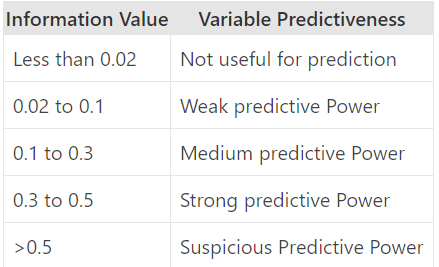

Accoding with this table,

* There are six variables with a suspicious power prediction: nr.employed, euribor3m, cons.conf.idx, emp.var.rate, poutcome and duration.

* There are three variables with a strong power prediction: month, previous and cons.price.idx.

* There are three variables with a medium power prediction: age, job and contact.

* There are four variables with a weak power prediction: marital, education, campaign and pdays.

* There are four variables with no power prediction: default, housing, loan and day_of_week.

### **Replace values with WOE values**

The variables that will be treated using WOE values are,

* age
* campaing
* duration

In [33]:
# AGE
#CREATE A DATAFRAME
age= pd.DataFrame(bank_df['age'])
age.columns = ['age']
age, age.columns

(       age
 0       56
 1       57
 2       37
 3       40
 4       56
 ...    ...
 41183   73
 41184   46
 41185   56
 41186   44
 41187   74
 
 [41188 rows x 1 columns], Index(['age'], dtype='object'))

In [34]:
age_table = woe[:10]
age_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,age,"(16.999, 28.0]",4216,736,0.158621,3480,0.095217,0.510355,0.032358
1,age,"(28.0, 31.0]",5114,608,0.131034,4506,0.123290,0.060922,0.000472
2,age,"(31.0, 33.0]",3679,394,0.084914,3285,0.089882,-0.056859,0.000282
3,age,"(33.0, 35.0]",3504,351,0.075647,3153,0.086270,-0.131411,0.001396
4,age,"(35.0, 38.0]",4662,434,0.093534,4228,0.115683,-0.212528,0.004707
5,age,"(38.0, 41.0]",3871,311,0.067026,3560,0.097406,-0.373811,0.011356
6,age,"(41.0, 45.0]",4311,348,0.075000,3963,0.108433,-0.368642,0.012325
7,age,"(45.0, 49.0]",3776,289,0.062284,3487,0.095409,-0.426458,0.014126
8,age,"(49.0, 55.0]",4473,428,0.092241,4045,0.110676,-0.182202,0.003359
9,age,"(55.0, 98.0]",3582,741,0.159698,2841,0.077733,0.720001,0.059015


In [35]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(age_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = age_table['WoE']
inter

,intervals,left,right,WOE
0,"(16.999, 28.0]",16.999,28.0,0.510355
1,"(28.0, 31.0]",28.000,31.0,0.060922
2,"(31.0, 33.0]",31.000,33.0,-0.056859
3,"(33.0, 35.0]",33.000,35.0,-0.131411
4,"(35.0, 38.0]",35.000,38.0,-0.212528
5,"(38.0, 41.0]",38.000,41.0,-0.373811
6,"(41.0, 45.0]",41.000,45.0,-0.368642
7,"(45.0, 49.0]",45.000,49.0,-0.426458
8,"(49.0, 55.0]",49.000,55.0,-0.182202
9,"(55.0, 98.0]",55.000,98.0,0.720001


In [36]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  age) & (age < inter['right'][0])
aux2 = (inter['left'][1] <=  age) & (age < inter['right'][1])
aux3 = (inter['left'][2] <=  age) & (age < inter['right'][2])
aux4 = (inter['left'][3] <=  age) & (age < inter['right'][3])
aux5 = (inter['left'][4] <=  age) & (age < inter['right'][4])
aux6 = (inter['left'][5] <=  age) & (age < inter['right'][5])
aux7 = (inter['left'][6] <=  age) & (age < inter['right'][6])
aux8 = (inter['left'][7] <=  age) & (age < inter['right'][7])
aux9 = (inter['left'][8] <=  age) & (age < inter['right'][8])
aux10 = (inter['left'][9] <=  age) & (age <= inter['right'][9])

In [37]:
#REPLACE VALUES WITH WOE
age[aux1] = inter['WOE'][0]
age[aux2] = inter['WOE'][1]
age[aux3] = inter['WOE'][2]
age[aux4] = inter['WOE'][3]
age[aux5] = inter['WOE'][4]
age[aux6] = inter['WOE'][5]
age[aux7] = inter['WOE'][6]
age[aux8] = inter['WOE'][7]
age[aux9] = inter['WOE'][8]
age[aux10] = inter['WOE'][9]

age.value_counts()

age      
-0.212528    5014
-0.182202    4664
-0.368642    4486
 0.720001    4230
 0.060922    4168
-0.426458    4040
-0.373811    4000
-0.056859    3793
-0.131411    3578
 0.510355    3215
dtype: int64

In [38]:
#REPLACE OLD VARIABLE
bank_df['age'] = age
bank_df['age'].value_counts()

-0.212528    5014
-0.182202    4664
-0.368642    4486
 0.720001    4230
 0.060922    4168
-0.426458    4040
-0.373811    4000
-0.056859    3793
-0.131411    3578
 0.510355    3215
Name: age, dtype: int64

In [39]:
#CAMPAIGN
#CREATE A DATAFRAME
campaign= pd.DataFrame(bank_df['campaign'])
campaign.columns = ['campaign']
campaign['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [40]:
#SELECT VALUES FOR CAMPAIGN VARIABLE
aux_c = woe['Variable'] == 'campaign' 
campaign_table = woe[aux_c]
campaign_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,campaign,"(0.999, 2.0]",28212,3511,0.756681,24701,0.675851,0.112969,0.009131
1,campaign,"(2.0, 3.0]",5341,574,0.123707,4767,0.130431,-0.052931,0.000356
2,campaign,"(3.0, 5.0]",4250,369,0.079526,3881,0.106189,-0.289139,0.007709
3,campaign,"(5.0, 56.0]",3385,186,0.040086,3199,0.087529,-0.780935,0.037050


In [41]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(campaign_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = campaign_table['WoE']
inter

,intervals,left,right,WOE
0,"(0.999, 2.0]",0.999,2.0,0.112969
1,"(2.0, 3.0]",2.000,3.0,-0.052931
2,"(3.0, 5.0]",3.000,5.0,-0.289139
3,"(5.0, 56.0]",5.000,56.0,-0.780935


In [42]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  campaign) & (campaign < inter['right'][0])
aux2 = (inter['left'][1] <=  campaign) & (campaign < inter['right'][1])
aux3 = (inter['left'][2] <=  campaign) & (campaign < inter['right'][2])
aux4 = (inter['left'][3] <=  campaign) & (campaign <= inter['right'][3])

In [43]:
#REPLACE VALUES WITH WOE
campaign[aux1] = inter['WOE'][0]
campaign[aux2] = inter['WOE'][1]
campaign[aux3] = inter['WOE'][2]
campaign[aux4] = inter['WOE'][3]

campaign.value_counts()

campaign 
 0.112969    17642
-0.052931    10570
-0.289139     7992
-0.780935     4984
dtype: int64

In [44]:
#REPLACE OLD VARIABLE
bank_df['campaign'] = campaign
bank_df['campaign'].value_counts()

 0.112969    17642
-0.052931    10570
-0.289139     7992
-0.780935     4984
Name: campaign, dtype: int64

In [45]:
#DURATION
#CREATE A DATAFRAME
duration= pd.DataFrame(bank_df['duration'])
duration.columns = ['duration']
duration['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [46]:
#SELECT VALUES FOR CAMPAIGN VARIABLE
aux_d = woe['Variable'] == 'duration' 
duration_table = woe[aux_d]
duration_table

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,duration,"(-0.001, 59.0]",4181,1,0.000216,4180,0.114370,-6.274154,0.716224
1,duration,"(59.0, 89.0]",4207,43,0.009267,4164,0.113932,-2.509119,0.262617
2,duration,"(89.0, 116.0]",3987,107,0.023060,3880,0.106162,-1.526849,0.126883
3,duration,"(116.0, 146.0]",4152,157,0.033836,3995,0.109308,-1.172641,0.088502
4,duration,"(146.0, 180.0]",4178,256,0.055172,3922,0.107311,-0.665267,0.034686
5,duration,"(180.0, 222.0]",4096,346,0.074569,3750,0.102605,-0.319160,0.008948
6,duration,"(222.0, 280.0]",4062,463,0.099784,3599,0.098473,0.013228,0.000017
7,duration,"(280.0, 368.0]",4103,554,0.119397,3549,0.097105,0.206656,0.004607
8,duration,"(368.0, 551.0]",4118,824,0.177586,3294,0.090128,0.678225,0.059316
9,duration,"(551.0, 4918.0]",4104,1889,0.407112,2215,0.060605,1.904707,0.659994


In [47]:
#CREATE STRUCTURE TO EXTRACT LIMITS
idx = pd.IntervalIndex(duration_table['Cutoff'])

#INTERVALS , LIMITS AND WOE VALUES
inter = pd.DataFrame({'intervals': idx, 'left': idx.left, 'right': idx.right})
inter['WOE'] = duration_table['WoE']
inter

,intervals,left,right,WOE
0,"(-0.001, 59.0]",-0.001,59.0,-6.274154
1,"(59.0, 89.0]",59.000,89.0,-2.509119
2,"(89.0, 116.0]",89.000,116.0,-1.526849
3,"(116.0, 146.0]",116.000,146.0,-1.172641
4,"(146.0, 180.0]",146.000,180.0,-0.665267
5,"(180.0, 222.0]",180.000,222.0,-0.319160
6,"(222.0, 280.0]",222.000,280.0,0.013228
7,"(280.0, 368.0]",280.000,368.0,0.206656
8,"(368.0, 551.0]",368.000,551.0,0.678225
9,"(551.0, 4918.0]",551.000,4918.0,1.904707


In [48]:
#CREATE AUXILIARY VARIABLES
inter['left'][0],inter['right'][0]

aux1 = (inter['left'][0] <=  duration) & (duration < inter['right'][0])
aux2 = (inter['left'][1] <=  duration) & (duration < inter['right'][1])
aux3 = (inter['left'][2] <=  duration) & (duration < inter['right'][2])
aux4 = (inter['left'][3] <=  duration) & (duration < inter['right'][3])
aux5 = (inter['left'][4] <=  duration) & (duration < inter['right'][4])
aux6 = (inter['left'][5] <=  duration) & (duration < inter['right'][5])
aux7 = (inter['left'][6] <=  duration) & (duration < inter['right'][6])
aux8 = (inter['left'][7] <=  duration) & (duration < inter['right'][7])
aux9 = (inter['left'][8] <=  duration) & (duration < inter['right'][8])
aux10 = (inter['left'][9] <=  duration) & (duration <= inter['right'][9])

In [49]:
#REPLACE VALUES WITH WOE
duration[aux1] = inter['WOE'][0]
duration[aux2] = inter['WOE'][1]
duration[aux3] = inter['WOE'][2]
duration[aux4] = inter['WOE'][3]
duration[aux5] = inter['WOE'][4]
duration[aux6] = inter['WOE'][5]
duration[aux7] = inter['WOE'][6]
duration[aux8] = inter['WOE'][7]
duration[aux9] = inter['WOE'][8]
duration[aux10] = inter['WOE'][9]

duration.value_counts()

duration 
-2.509119    4185
-1.172641    4176
-0.665267    4163
 0.206656    4132
 0.678225    4127
 1.904707    4123
-0.319160    4120
 0.013228    4098
-6.274154    4050
-1.526849    4014
dtype: int64

In [50]:
#REPLACE OLD VARIABLE
bank_df['duration'] = duration
bank_df['duration'].value_counts()

-2.509119    4185
-1.172641    4176
-0.665267    4163
 0.206656    4132
 0.678225    4127
 1.904707    4123
-0.319160    4120
 0.013228    4098
-6.274154    4050
-1.526849    4014
Name: duration, dtype: int64

In [51]:
#FINAL DATA
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.720001,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.013228,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,0.720001,services,married,high.school,unknown,no,no,telephone,may,mon,-0.665267,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,-0.212528,services,married,high.school,no,yes,no,telephone,may,mon,0.013228,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,-0.373811,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.665267,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,0.720001,services,married,high.school,no,no,yes,telephone,may,mon,0.206656,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [52]:
bank_df.shape

(41188, 21)

# Missing Values

In [68]:
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Although the dataset does not present NaN data, there are instances with "unknown" values.

In [66]:
bank_df.replace('unknown', np.nan, regex=True,inplace=True)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.720001,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.013228,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,-0.212528,services,married,high.school,no,yes,no,telephone,may,mon,0.013228,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,-0.373811,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.665267,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,0.720001,services,married,high.school,no,no,yes,telephone,may,mon,0.206656,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,0.720001,admin.,married,professional.course,no,no,no,telephone,may,mon,-1.172641,0.112969,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Text(0, 0.5, 'NaNs')

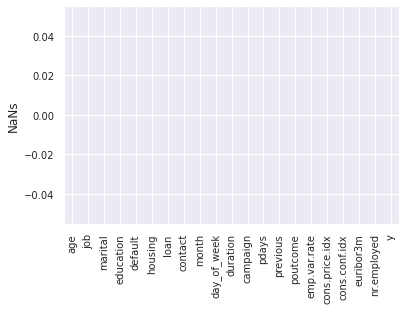

In [67]:
bank_df.isna().sum().plot.bar()
plt.ylabel("NaNs")

In [64]:
nulos = round(bank_df.isna().mean()*100,2)
nulos = nulos.sort_values(ascending=False)
print('Percentage of missing values: \n')
nulos[0:6]

Percentage of missing values: 



y              0.0
day_of_week    0.0
job            0.0
marital        0.0
education      0.0
default        0.0
dtype: float64

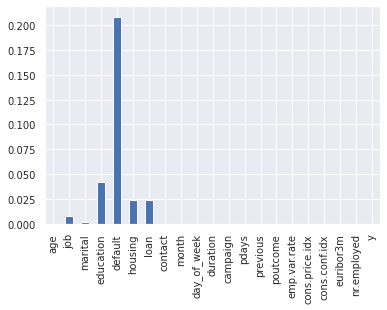

In [ ]:
bank_df.isna().mean().plot.bar()


### Missing data pattern: MCAR, MAR, MNAR

In [ ]:
!pip install quilt

     |████████████████████████████████| 112kB 8.8MB/s 
100% 420k/420k [00:00<00:00, 695kB/s]


In [ ]:
!quilt install ResidentMario/missingno_datay

ResidentMario/missingno_data already installed.
Overwrite? (y/n) y
Fragments already downloaded


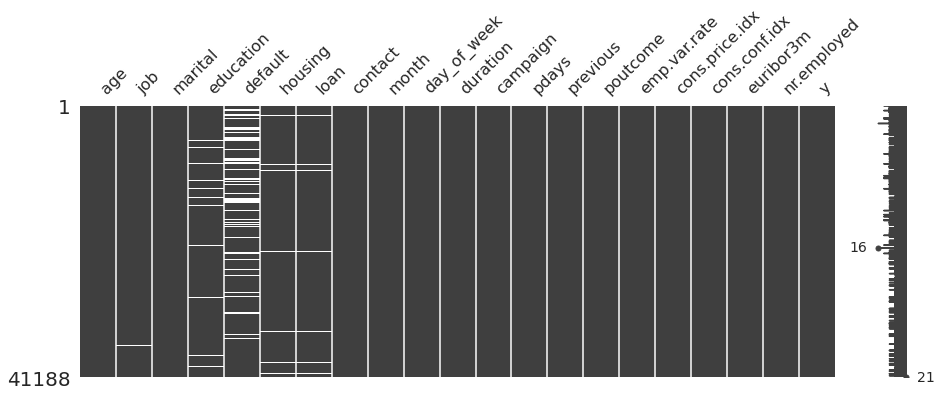

In [ ]:
from quilt.data.ResidentMario import missingno_data
import missingno as msno
msno.matrix(bank_df, figsize=(15,5))

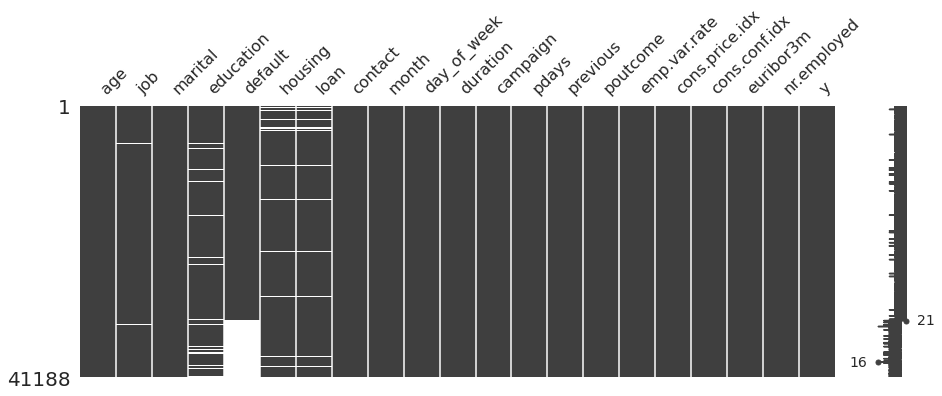

In [ ]:
sorted_bank_df = bank_df.sort_values("default")
msno.matrix(sorted_bank_df, figsize=(15,5))

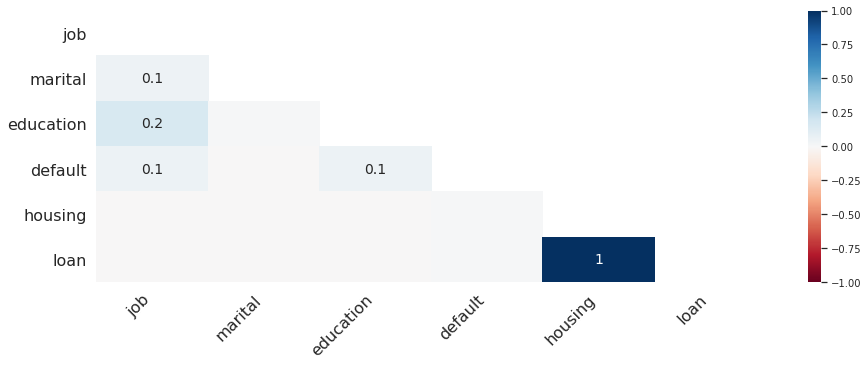

In [ ]:
msno.heatmap(sorted_bank_df, figsize=(15,5))

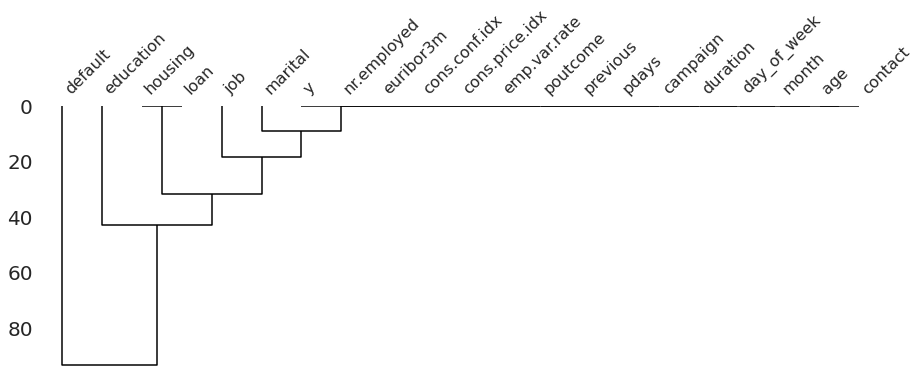

In [ ]:
msno.dendrogram(sorted_bank_df, figsize=(15,5))

### **Conclusion**

In [63]:
nulos = round(bank_df.isna().mean()*100,2)
nulos = nulos.sort_values(ascending=False)
print('Porcentaje de nulos según feature: ')
nulos[0:6]

Porcentaje de nulos según feature: 


y              0.0
day_of_week    0.0
job            0.0
marital        0.0
education      0.0
default        0.0
dtype: float64

- **We will remove `default`** since the missing percentage is very high. Imputing 20% of the values in this section at random would create a lot of bias since we are going to be assigning labels ('and' [both positive and negative]) to positive default values (people who have default). And in reality, it is information that we do not have or are not certain about (the number of people with positive default according to this dataset is 3 people ...).

- Following the same approach just mentioned, we will try to avoid any type of bias so we will eliminate the rest of the missing parts, even though they are not in large quantities.

### **Removing mising values**

In [62]:
bank_df = bank_df.dropna()

In [70]:
nulos = round(bank_df.isna().mean()*100,2)
nulos = nulos.sort_values(ascending=False)
print('Porcentaje de nulos según feature: ')
nulos

Porcentaje de nulos según feature: 


y                 0.0
day_of_week       0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
duration          0.0
nr.employed       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
age               0.0
dtype: float64